In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Shreedevi Tallam\Downloads\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

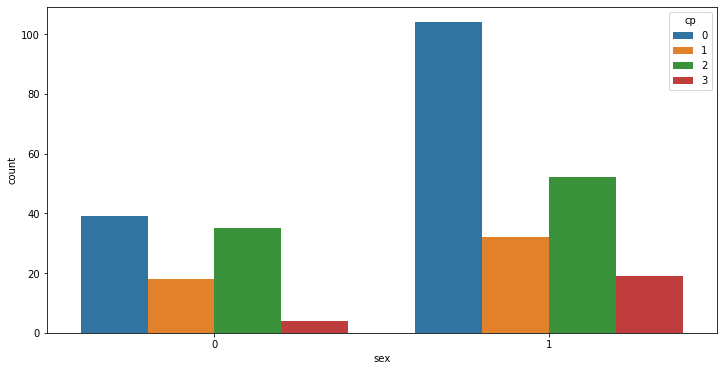

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(df['sex'], hue=df['cp'])

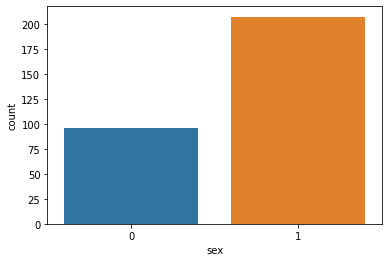

In [7]:
sns.countplot(df['sex'])

In [8]:
# Many more male members in the data

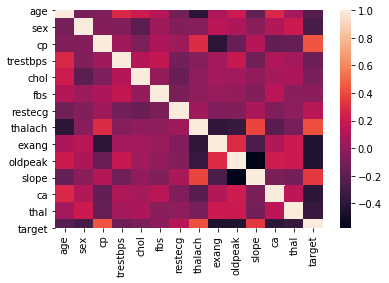

In [9]:
sns.heatmap(df.corr())

In [10]:
df['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

(array([ 1.,  6., 11., 26., 35., 53., 77., 63., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <a list of 10 Patch objects>)

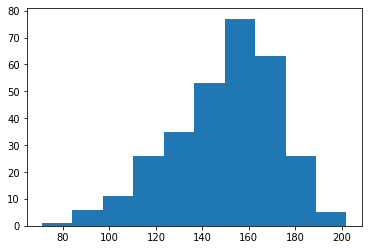

In [12]:
plt.hist(df['thalach'])

In [13]:
df['cp'].corr(df['thalach'])

0.2957621245879105

In [14]:
df['sex'].corr(df['thalach'])

-0.044019907769574755

In [15]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
prediction = dtree.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79        44
           1       0.76      0.96      0.85        47

    accuracy                           0.82        91
   macro avg       0.85      0.82      0.82        91
weighted avg       0.85      0.82      0.82        91



In [63]:
print(confusion_matrix(y_test, prediction))

[[30 14]
 [ 2 45]]


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc = RandomForestClassifier(n_estimators=160)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
prediction = rfc.predict(X_test)

In [67]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.82      0.87      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [68]:
print(confusion_matrix(y_test, prediction))

[[35  9]
 [ 6 41]]


In [69]:
from sklearn.svm import SVC

In [70]:
svc = SVC()

In [71]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
prediction = svc.predict(X_test)

In [73]:
print(confusion_matrix(y_test, prediction))

[[20 24]
 [ 6 41]]


In [74]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57        44
           1       0.63      0.87      0.73        47

    accuracy                           0.67        91
   macro avg       0.70      0.66      0.65        91
weighted avg       0.70      0.67      0.65        91



In [75]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [0.0001, 0.001, 0.1, 1, 10], 'kernel': ['rbf']} 

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 1, n_jobs=-1)

In [78]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.1, 1, 10],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [79]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [80]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
prediction = grid.predict(X_test)

In [82]:
print(confusion_matrix(y_test, prediction))

[[32 12]
 [ 4 43]]


In [83]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [84]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr = LogisticRegression(C = 1.3)

In [118]:
lr.fit(X_train, y_train)

C:\Users\Shreedevi Tallam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
prediction = lr.predict(X_test)

In [120]:
print(confusion_matrix(y_test, prediction))

[[36  8]
 [ 2 45]]


In [121]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        44
           1       0.85      0.96      0.90        47

    accuracy                           0.89        91
   macro avg       0.90      0.89      0.89        91
weighted avg       0.90      0.89      0.89        91

